<a href="https://colab.research.google.com/github/yadavrahyl2k15/Multiple-Linear-Regression/blob/master/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_excel("/content/TRUCKING.xlsx")
df

FileNotFoundError: ignored

In [ ]:
df.rename(columns={'DISTANCE TRAVEL':'x1'},inplace=True)
df.head()

In [ ]:
plt.figure()
plt.scatter(df['x1'],df['TRAVEL_TIME'],color='green')
plt.ylabel("travel time")
plt.title("simple linearn regression")

In [ ]:
plt.figure()
plt.scatter(df['NO_OF_DELEVIERS'],df['TRAVEL_TIME'],color="blue")
plt.ylabel("travel time")
plt.title("simple linear regression")

In [ ]:
plt.figure()
plt.scatter(df['DISTANCE TRAVEL'],df['TRAVEL_TIME'],color='green')
plt.scatter(df['NO_OF_DELEVIERS'],df['TRAVEL_TIME'],color='red')
plt.ylabel("travel time")
plt.title("multiple regression model")

for simple linear regression model for independent variable distance travel

In [ ]:
reg1=ols(formula= "TRAVEL_TIME~x1",data=df)
fit1=reg1.fit()
print(fit1.summary())

In [ ]:
reg2=ols(formula="TRAVEL_TIME~x1 + NO_OF_DELEVIERS",data=df)
fit2=reg2.fit()
print(fit2.summary())

**HANDLING CATEGORICAL VARIABLES**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.api as s
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel("/content/Book 3.xlsx")
df

,service_call,months_since_last_service,type_of_repair,repair_time_in_hour
0,1,2,electical,2.9
1,2,6,mechanical,3.0
2,3,8,electical,4.8
3,4,3,mechanical,1.8
4,5,2,electical,2.9
5,6,7,electical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electical,4.4
9,10,6,electical,4.5


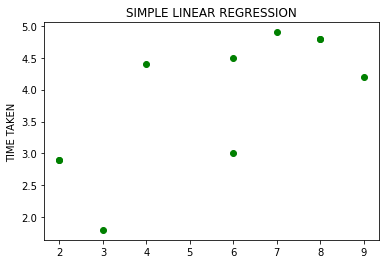

In [ ]:
plt.scatter(df['months_since_last_service'],df['repair_time_in_hour'],color='green')
plt.ylabel("TIME TAKEN")
plt.title("SIMPLE LINEAR REGRESSION")
plt.show()

In [ ]:
from statsmodels.formula.api import ols
reg=ols(formula="repair_time_in_hour~months_since_last_service",data=df)
fit=reg.fit()
fit.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     repair_time_in_hour   R-squared:                       0.534
Model:                             OLS   Adj. R-squared:                  0.476
Method:                  Least Squares   F-statistic:                     9.174
Date:                 Tue, 16 Mar 2021   Prob (F-statistic):             0.0163
Time:                         07:19:01   Log-Likelihood:                -10.602
No. Observations:                   10   AIC:                             25.20
Df Residuals:                        8   BIC:                             25.81
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.1473      0.605      3.549      0.008       0.752       3.542
months_since_last_service     0.3041      0.100      3.029      0.016       0.073       0.536
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.751
Skew:                          -0.501   Prob(JB):                        0.687
Kurtosis:                       2.107   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

from above we get y=2.14+0.3(months_since_last_service)
now use error analysis to find other parameter is needed or not

In [ ]:
influence=fit.get_influence()
residual=influence.resid_studentized_external

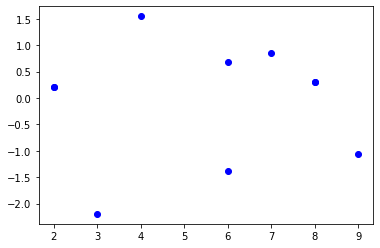

In [ ]:
plt.figure()
plt.scatter(df['months_since_last_service'],residual,color='blue')
plt.show()

We found that most of points lie above zero line so there are others factors also

**ANOTHER METHOD**

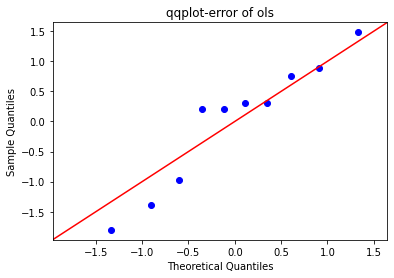

In [ ]:
from scipy import stats
residual=fit.resid
probplot= s.ProbPlot(residual,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
h=plt.title('qqplot-error of ols')
plt.show()

we can see from figure point lie above line and so we need more factors to find relationship

**DUMMIES VARIBALES**

In [ ]:
just_dummies=pd.get_dummies(df['type_of_repair'])
just_dummies

,electical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [ ]:
data=pd.concat([df,just_dummies],axis=1)
data

,service_call,months_since_last_service,type_of_repair,repair_time_in_hour,electical,mechanical
0,1,2,electical,2.9,1,0
1,2,6,mechanical,3.0,0,1
2,3,8,electical,4.8,1,0
3,4,3,mechanical,1.8,0,1
4,5,2,electical,2.9,1,0
5,6,7,electical,4.9,1,0
6,7,9,mechanical,4.2,0,1
7,8,8,mechanical,4.8,0,1
8,9,4,electical,4.4,1,0
9,10,6,electical,4.5,1,0


In [ ]:
data.drop(['type_of_repair',"mechanical"],inplace=True,axis=1)
data

,service_call,months_since_last_service,repair_time_in_hour,electical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


conclude a linerar equation using onlye elctrical factor

In [ ]:
import statsmodels.formula.api as smf
result=ols(formula='repair_time_in_hour~ months_since_last_service + electical',data=data)
result=result.fit()
result.summary()


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     repair_time_in_hour   R-squared:                       0.859
Model:                             OLS   Adj. R-squared:                  0.819
Method:                  Least Squares   F-statistic:                     21.36
Date:                 Tue, 16 Mar 2021   Prob (F-statistic):            0.00105
Time:                         07:33:55   Log-Likelihood:                -4.6200
No. Observations:                   10   AIC:                             15.24
Df Residuals:                        7   BIC:                             16.15
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.9305      0.467      1.993      0.087      -0.174       2.035
months_since_last_service     0.3876      0.063      6.195      0.000       0.240       0.536
electical                     1.2627      0.314      4.020      0.005       0.520       2.005
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.663
Skew:                           0.994   Prob(JB):                        0.435
Kurtosis:                       2.795   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""